<a href="https://colab.research.google.com/github/etalab-ia/ami-ia/blob/master/notebooks/ami_ia_dataviz_rr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premiers pas avec Jupyter Notebook et Pandas 

Objectifs: 
  - charger un jeu de données de data.gouv
  - obtenir quelques statistiques basiques sur le jeu de données
  - visualiser les données 
  - nettoyer les données 
  - visualiser des données géo 


  Un exemple avec le jeu de données Alim'Confiance de datagouv à télécharger [ici](https://dgal.opendatasoft.com/explore/dataset/export_alimconfiance/export/?disjunctive.app_libelle_activite_etablissement&disjunctive.filtre&disjunctive.ods_type_activite) 

In [1]:
# importer les librairies dont on aura besoin 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
# lire le jeu de données en un objet "pandas dataframe"
#df = pd.read_csv("https://dgal.opendatasoft.com/explore/dataset/export_alimconfiance/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B", sep = ";", header = 0)

# lire le jeu de données en un objet "pandas dataframe"
df = pd.read_csv('../data/export_alimconfiance.csv', sep = ";", header = 0)

In [3]:
# commande qui permet de visualiser les n premieres lignes d'une dataframe (5 par défaut)
df.head()

APP_Libelle_etablissement           SIRET  Code_postal  Libelle_commune  \
0                 LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   
1      LE CARDEUR DE BACCHUS  82183401700013      13100.0  AIX EN PROVENCE   
2              CARREFOUR BAR  40829886700016      13100.0  AIX EN PROVENCE   
3           LES FILS A MAMAN  83283779300021      13100.0  AIX EN PROVENCE   
4  LE FOURNIL DES CORDELIERS  48466238200023      13100.0  AIX EN PROVENCE   

  Numero_inspection            Date_inspection  \
0                 2  2019-05-22T13:00:00+02:00   
1                 3  2019-05-24T13:30:00+02:00   
2                 6  2019-05-21T12:30:00+02:00   
3                 0  2019-06-13T13:45:00+02:00   
4                 1  2019-06-07T11:30:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit Agrement  \
0                         Restaurant   Très satisfaisant      NaN   
1                         Restaurant   Très satisfaisant      NaN   
2                         Restaurant   Très satisfaisant      NaN   
3                         Restaurant   Très satisfaisant      NaN   
4             Boulangerie-Pâtisserie   Très satisfaisant      NaN   

               geores                  filtre                 ods_adresse  \
0    43.531956,5.4468              Restaurant  34 rue Jacques de la Roque   
1  43.529969,5.446457              Restaurant       14 Forum des cardeurs   
2  43.525265,5.453713              Restaurant        2 rue Roux Alpherand   
3  43.528498,5.447157              Restaurant             42 rue Verrerie   
4   43.52948,5.444981  Boulangerie-Pâtisserie       67 rue des Cordeliers   

  ods_type_activite  
0            Autres  
1            Autres  
2            Autres  
3            Autres  
4            Autres

In [4]:
# donne le (nb de lignes, nb de colonnes)
df.shape

(38634, 13)

In [5]:
# regarder le type des variables
df.dtypes

APP_Libelle_etablissement              object
SIRET                                  object
Code_postal                           float64
Libelle_commune                        object
Numero_inspection                      object
Date_inspection                        object
APP_Libelle_activite_etablissement     object
Synthese_eval_sanit                    object
Agrement                               object
geores                                 object
filtre                                 object
ods_adresse                            object
ods_type_activite                      object
dtype: object

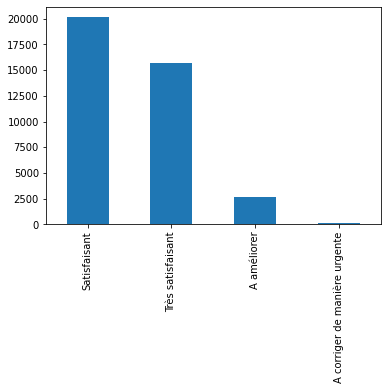

In [6]:
df['Synthese_eval_sanit'].value_counts().plot(kind='bar')

In [7]:
df["APP_Libelle_activite_etablissement"].value_counts().head(20)

Restaurant                                                     14800
Restauration collective                                         6449
Producteur fermier                                              1792
Transformation de lait ou produits laitiers                     1351
Boucherie-Charcuterie                                           1242
Transformation de produits carnés                               1156
Boulangerie-Pâtisserie                                          1054
Alimentation générale                                            938
Chaîne d'abattage de volaille/lagomorphe/petit gibier            936
Purification/Expédition de coquillages                           867
Découpe de viande de boucherie                                   675
Libre service                                                    467
Transport de denrées alimentaires                                427
Traiteur                                                         381
Entreposage de distribution de den

In [8]:
# On limite notre analyse aux restaurants 
df = df[df["APP_Libelle_activite_etablissement"]=="Restaurant"]

In [9]:
# créer une variable latitude et longitude à partir de la colonne geo res
set(type(x) for x in df["geores"].values.tolist())

{float, str}

In [10]:
df["lat"] = df["geores"].map(lambda x: float(x.split(",")[0] if pd.isnull(x)==False else x))
df["long"] = df["geores"].map(lambda x: float(x.split(",")[1] if pd.isnull(x)==False else x))

In [11]:
geo_df = df.dropna(subset =["lat", "long"])

Text(0.5, 1.0, 'Répartition des restaurants notés ')

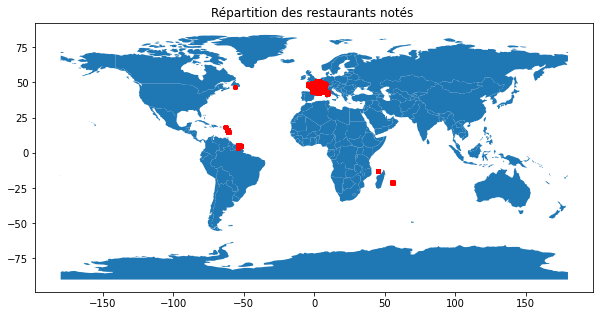

In [12]:
geometry = [Point(xy) for xy in zip(geo_df['long'], geo_df['lat'])]
gdf = GeoDataFrame(geo_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
plt.title("Répartition des restaurants notés ")

In [13]:
geo_df_fr = geo_df[(geo_df.lat>41.12)&(geo_df.lat<51.84)&(geo_df.long<11.3)&(geo_df.long>-6.25)]

Text(0.5, 1.0, 'Répartition des notes sanitaires sur le territoire')

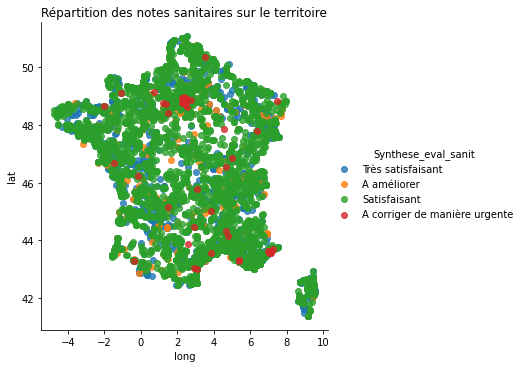

In [14]:
sns.lmplot('long', 'lat', data=geo_df_fr, hue='Synthese_eval_sanit', fit_reg=False)
plt.title("Répartition des notes sanitaires sur le territoire")

## Objectif de travail
Notre but est de contrôler l'inspection des restaurants. On s'est fixé les KPI suivants et on aimerait pouvoir les suivre :
* Nombre de controles mensuels par région, (EST-IL possible de mesurer en pourcentage ?)
* Taux de contrôles à améliorer ou à corriger par rapport aux controles effectués

### Nombre de contrôles par mois par région.
Pour cela il va falloir :
1. Connaître la région à laquelle le restaurant appartient 
2. Calculer le nombre de contrôles mensuels pour chacune des régions
3. Calculer le ratio de controles par rapport au nombre d'habitants 
4. Sortir une liste par région où il n'y a pas assez eu de contrôle mensuels. On pourrait se fixer comme limite minimum qu'il faut 1 controle pour 100 000 habitants tous les mois. 

In [15]:
df_cities = pd.read_csv('../data/cities.csv')
df_departments = pd.read_csv('../data/departments.csv')
df_regions = pd.read_csv('../data/regions.csv')
df_pop_regions = pd.read_csv('../data/pop_regions.csv')

In [16]:
#for further processing we need to change the columns names for region
df_regions.columns= ['id', 'region_code', 'region_name', 'slug']
df_with_regions = pd.merge(df, df_cities, how= 'left', left_on = 'Code_postal', right_on = 'zip_code')
df_with_regions = pd.merge(df_with_regions, df_departments, how= 'left', left_on = 'department_code', right_on = 'code')
df_with_regions = pd.merge(df_with_regions, df_regions, how= 'left', on = 'region_code')

# the problem with this merging is that it generated many duplicates due to small cities having the same zip code
df_with_regions.head()

APP_Libelle_etablissement           SIRET  Code_postal  Libelle_commune  \
0                LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   
1                LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   
2                LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   
3                LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   
4                LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   

  Numero_inspection            Date_inspection  \
0                 2  2019-05-22T13:00:00+02:00   
1                 2  2019-05-22T13:00:00+02:00   
2                 2  2019-05-22T13:00:00+02:00   
3                 2  2019-05-22T13:00:00+02:00   
4                 2  2019-05-22T13:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit Agrement  \
0                         Restaurant   Très satisfaisant      NaN   
1                         Restaurant   Très satisfaisant      NaN   
2                         Restaurant   Très satisfaisant      NaN   
3                         Restaurant   Très satisfaisant      NaN   
4                         Restaurant   Très satisfaisant      NaN   

             geores  ...    gps_lat   gps_lng  id_y  region_code  code  \
0  43.531956,5.4468  ...  43.533834  5.509247  13.0           93    13   
1  43.531956,5.4468  ...  43.523233  5.546260  13.0           93    13   
2  43.531956,5.4468  ...  43.517019  5.594303  13.0           93    13   
3  43.531956,5.4468  ...  43.553539  5.527096  13.0           93    13   
4  43.531956,5.4468  ...  43.520782  5.504442  13.0           93    13   

             name_y            slug_y    id                 region_name  \
0  Bouches-du-Rhône  bouches du rhone  17.0  Provence-Alpes-Côte d'Azur   
1  Bouches-du-Rhône  bouches du rhone  17.0  Provence-Alpes-Côte d'Azur   
2  Bouches-du-Rhône  bouches du rhone  17.0  Provence-Alpes-Côte d'Azur   
3  Bouches-du-Rhône  bouches du rhone  17.0  Provence-Alpes-Côte d'Azur   
4  Bouches-du-Rhône  bouches du rhone  17.0  Provence-Alpes-Côte d'Azur   

                        slug  
0  provence alpes cote dazur  
1  provence alpes cote dazur  
2  provence alpes cote dazur  
3  provence alpes cote dazur  
4  provence alpes cote dazur  

[5 rows x 31 columns]

In [17]:
# it is usefull to check the number of nan in the table
df_with_regions.isna().sum()

APP_Libelle_etablissement                 1
SIRET                                     0
Code_postal                             312
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              55184
geores                                 2200
filtre                                    0
ods_adresse                             782
ods_type_activite                         0
lat                                    2200
long                                   2200
id_x                                     35
department_code                          35
insee_code                              377
zip_code                                347
name_x                                   35
slug_x                                   35
gps_lat                                  35
gps_lng                         

In [18]:
# cleaning of the nan
df_with_regions.dropna(subset=['region_code'], inplace=True)
df_with_regions.isna().sum()

APP_Libelle_etablissement                 1
SIRET                                     0
Code_postal                             312
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              55149
geores                                 2175
filtre                                    0
ods_adresse                             781
ods_type_activite                         0
lat                                    2175
long                                   2175
id_x                                      0
department_code                           0
insee_code                              342
zip_code                                312
name_x                                    0
slug_x                                    0
gps_lat                                   0
gps_lng                         

In [19]:
#keep only original columns + regions
columns = df.columns.tolist()
columns += ['region_name', 'region_code']
df_with_regions = df_with_regions.filter(items=columns)
#remove duplicates
df_with_regions.drop_duplicates(ignore_index=True, inplace= True)

In [20]:
#We need a tracking to the month, so we need to work a bit on the time values
from datetime import datetime
def transform_date (string_date):
  datestr = string_date.split('+')[0] #remove the last bit of the data (ms) we don't need that
  return datetime.strptime(datestr,'%Y-%m-%dT%H:%M:%S') #convert the data into datetime object
df_with_regions['Date_inspection'] = df_with_regions['Date_inspection'].apply(lambda x : transform_date(x))
df_with_regions.head()

APP_Libelle_etablissement           SIRET  Code_postal  Libelle_commune  \
0                LE GAULOIS  84752155600013      13100.0  AIX EN PROVENCE   
1     LE CARDEUR DE BACCHUS  82183401700013      13100.0  AIX EN PROVENCE   
2             CARREFOUR BAR  40829886700016      13100.0  AIX EN PROVENCE   
3          LES FILS A MAMAN  83283779300021      13100.0  AIX EN PROVENCE   
4          LA CAVE DES OURS  84995458100013      13100.0  AIX EN PROVENCE   

  Numero_inspection     Date_inspection APP_Libelle_activite_etablissement  \
0                 2 2019-05-22 13:00:00                         Restaurant   
1                 3 2019-05-24 13:30:00                         Restaurant   
2                 6 2019-05-21 12:30:00                         Restaurant   
3                 0 2019-06-13 13:45:00                         Restaurant   
4                 4 2019-06-13 13:30:00                         Restaurant   

  Synthese_eval_sanit Agrement              geores      filtre  \
0   Très satisfaisant      NaN    43.531956,5.4468  Restaurant   
1   Très satisfaisant      NaN  43.529969,5.446457  Restaurant   
2   Très satisfaisant      NaN  43.525265,5.453713  Restaurant   
3   Très satisfaisant      NaN  43.528498,5.447157  Restaurant   
4   Très satisfaisant      NaN   43.532264,5.44666  Restaurant   

                  ods_adresse ods_type_activite        lat      long  \
0  34 rue Jacques de la Roque            Autres  43.531956  5.446800   
1       14 Forum des cardeurs            Autres  43.529969  5.446457   
2        2 rue Roux Alpherand            Autres  43.525265  5.453713   
3             42 rue Verrerie            Autres  43.528498  5.447157   
4  20 rue Jacques de la Roque            Autres  43.532264  5.446660   

                  region_name region_code  
0  Provence-Alpes-Côte d'Azur          93  
1  Provence-Alpes-Côte d'Azur          93  
2  Provence-Alpes-Côte d'Azur          93  
3  Provence-Alpes-Côte d'Azur          93  
4  Provence-Alpes-Côte d'Azur          93

In [21]:
# Group the data by month and by region 
grouped = df_with_regions.groupby([pd.Grouper(key = 'Date_inspection', freq = 'm'),'region_code'])['Synthese_eval_sanit'].count()

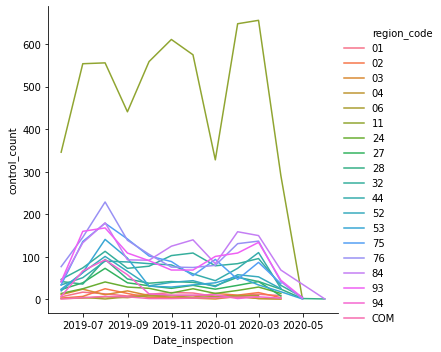

In [22]:
#Before ploting we need to do some transforming of our 
df_inspections = grouped.unstack('region_code').reset_index().melt('Date_inspection', var_name = 'region_code', value_name = 'control_count')
sns.relplot(x = 'Date_inspection', y= 'control_count', hue = 'region_code', data= df_inspections, kind = 'line')

In [23]:
# at this point it would be interesting to link with the region population
#clean 'COM' region
df_inspections = df_inspections[df_inspections.region_code != 'COM']
# convert region_codes to int in order to merge
df_inspections['region_code_int'] = df_inspections['region_code'].astype('int64')
df_inspections = pd.merge(df_inspections, df_pop_regions, how= 'left', left_on='region_code', right_on='Code région')
df_inspections['ratio_control_for100000'] = df_inspections['control_count'] / df_inspections['Population totale'] * 100000

/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
df_inspections.head()

In [ ]:
sns.set_style("whitegrid")
g = sns.relplot(x = 'Date_inspection', y= 'ratio_control_for100000', hue = 'Nom de la région', data= df_inspections, kind = 'line')
g.set(ylim=(0, 2))